<a href="https://colab.research.google.com/github/Vasanth03/Bank-Loan-Default-Prediction-Supervised-ML-Algorithms/blob/main/Banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bank Loan Defaulter Prediction**

####**About the Dataset**
Contains 15 features about credit applicants.

*Feature Description:*
1. Id               : Unique customer ID for the application.
2. grade            : A quality score based on the borrower's history.
3. annual_inc       : Annual income self-disclosed by the applicant during loan application registration.
4. short_emp        : Duration of employment less than a year(0) otherwise(1).
5. emp_length_num   : Length of employment from 0 to 10 years. 10 indicates    
10 and more than 10 years of experience.
6. home_ownership.  : Spedicfies the type of home ownership.
7. dti              : Debt-To-Income ratio - calculated using the borrower’s   
monthly debt(excluding mortgage, LCloan) divided by the borrower’s self-reported monthly income.
8. purpose          : Reason for Loan request.
9. term             : The number of months on repyment (36 or 60 months).
10. last_delinq_none     : Atleast one event of criminal behaviour.
11. last_major_derog_none: Atleast 90 days of bad rating.
12. revol_util           : Percentage of credit utilization relative to the   
available revolving credit.
13. total_rec_late_fee   : Late fees received to date.
14. od_ratio             : Overdraft ratio.
15. bad_loan             : 1 when a loan was not paid.




#### **`Importing Libraries and Loading Dataset`**

In [ ]:
# Pandas library is used for Data Maniplulation and Analysis
import pandas as pd

In [ ]:
# Numpy library is used to perform mathematical operations
import numpy as np

In [ ]:
# Library used for scientific computing and technical computing
import scipy.stats as stats

In [ ]:
# Used for advanced visualization
import seaborn as sns

# Data visualization library
import matplotlib.pyplot as plt

# Visualization plots
import pylab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loan.csv to loan.csv


In [ ]:
# For reading the files from 
ln = pd.read_csv("/content/loan.csv")

#### **`Basic Information about the Dataset`**

In [ ]:
# Shape of the dataset
ln.shape

(20000, 15)

The dataset has information about 20,000 applicants with has 15 features.

In [ ]:
# Displays top 5 entries of the dataframe
ln.head()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0


In [ ]:
# Displays bottom 5 entries of the dataframe
ln.tail()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
19995,6595657,B,27000.0,0,9,RENT,18.36,debt_consolidation,36 months,1,NaN,46.5,0.0,0.821782,1
19996,1576331,B,45000.0,0,2,MORTGAGE,23.22,major_purchase,36 months,0,NaN,46.2,0.0,0.652200,0
19997,6645736,B,104000.0,0,5,MORTGAGE,13.27,debt_consolidation,36 months,1,NaN,78.5,0.0,0.482555,0
19998,6625736,A,38400.0,0,2,MORTGAGE,12.84,debt_consolidation,36 months,0,NaN,47.4,0.0,0.822980,0
19999,6625685,B,150000.0,0,11,MORTGAGE,2.20,credit_card,36 months,0,NaN,40.7,0.0,0.201388,0


In [ ]:
# Get the column names of the dataframe
ln.columns

Index(['id', 'grade', 'annual_inc', 'short_emp', 'emp_length_num',
       'home_ownership', 'dti', 'purpose', 'term', 'last_delinq_none',
       'last_major_derog_none', 'revol_util', 'total_rec_late_fee', 'od_ratio',
       'bad_loan'],
      dtype='object')

In [ ]:
# The describe(), returns description about the statistical values of the 
# numerical data in the DataFrame.
ln.describe()

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
count,2.000000e+04,20000.000000,20000.000000,20000.00000,19846.000000,20000.000000,574.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,7.590662e+06,73349.578350,0.112500,6.82140,16.587841,0.546600,0.759582,55.958148,0.290622,0.504430,0.20000
std,1.609593e+06,45198.567255,0.315989,3.77423,7.585812,0.497836,0.427710,42.117456,3.108654,0.287720,0.40001
min,5.860400e+05,8412.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000077,0.00000
25%,6.206283e+06,47000.000000,0.000000,3.00000,10.852500,0.000000,1.000000,38.800000,0.000000,0.257356,0.00000
50%,7.378896e+06,65000.000000,0.000000,7.00000,16.190000,1.000000,1.000000,57.100000,0.000000,0.506681,0.00000
75%,8.766235e+06,88000.000000,0.000000,11.00000,22.060000,1.000000,1.000000,73.900000,0.000000,0.753771,0.00000
max,1.145464e+07,1000000.000000,1.000000,11.00000,34.990000,1.000000,1.000000,5010.000000,96.466600,0.999894,1.00000


In [ ]:
# Displays datatypes of all the features and non-null count values
ln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  float64
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

In [ ]:
# Counting the number of distinct datatypes
ln.dtypes.value_counts()


float64    6
int64      5
object     4
dtype: int64

In [ ]:
# Displays some of the null 
ln.isnull().sum()

id                           0
grade                        0
annual_inc                   0
short_emp                    0
emp_length_num               0
home_ownership            1491
dti                        154
purpose                      0
term                         0
last_delinq_none             0
last_major_derog_none    19426
revol_util                   0
total_rec_late_fee           0
od_ratio                     0
bad_loan                     0
dtype: int64

In [ ]:
# To find the duplicate entries present in the given dataset
ln.duplicated().sum()

0

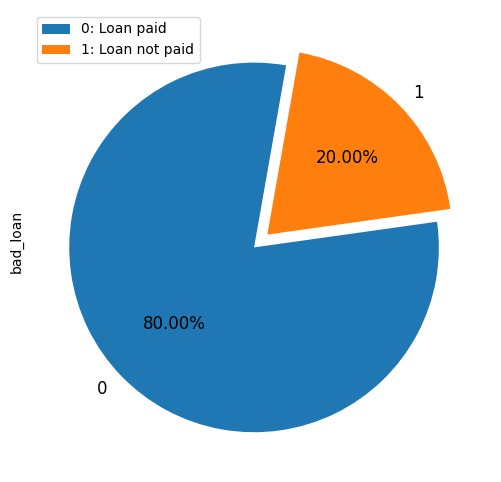

In [ ]:
# Checking data balance/proportion
loan = ln.bad_loan.value_counts().to_frame().rename(columns={"bad_loan":"absolute"})
loan["percent"] = (loan.apply(lambda x: x/x.sum()*100).round(2))

ln.bad_loan.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["0: Loan paid","1: Loan not paid"])


### **`Preprocessing`** 

###### **1. Variance Test**

In [ ]:
Variance_data = ln.var()
Variance_data

<ipython-input-19-29c9960545a2>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Variance_data = ln.var()


id                       2.590791e+12
annual_inc               2.042910e+09
short_emp                9.984874e-02
emp_length_num           1.424481e+01
dti                      5.754454e+01
last_delinq_none         2.478408e-01
last_major_derog_none    1.829360e-01
revol_util               1.773880e+03
total_rec_late_fee       9.663732e+00
od_ratio                 8.278289e-02
bad_loan                 1.600080e-01
dtype: float64

Variance is a measurement of the spread between numbers in a data set.

###### **2. Missing Values Treatment**

In [ ]:
for column in ln.columns:
    if ln[column].isna().sum() != 0:
        missing = ln[column].isna().sum()
        portion = (missing / ln.shape[0]) * 100
        print(f"'{column}': Missing values '{missing}' ---> '{portion:.3f}%'")

'home_ownership': Missing values '1491' ---> '7.455%'
'dti': Missing values '154' ---> '0.770%'
'last_major_derog_none': Missing values '19426' ---> '97.130%'


In [ ]:
# 1.last_major_derog_none
# Since 97 percent of the data is missing, the column (Atleast 90 days of bad rating) is dropped
ln = ln.drop(['last_major_derog_none'],axis=1)

In [ ]:
# 2. dti - Numerical datatype - Mean Imputation
# Finding the mean of the column having NaN
# Replace NaNs with the mean of values in the same column
ln['dti'].fillna(value=ln['dti'].mean(), inplace=True)

In [ ]:
ln['home_ownership'].value_counts(dropna=False)

MORTGAGE    9844
RENT        7052
OWN         1613
NaN         1491
Name: home_ownership, dtype: int64

<Axes: >

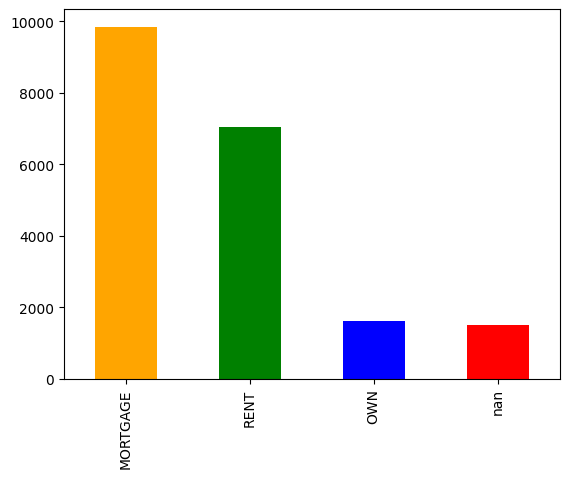

In [ ]:
# 3. home_ownership
ln['home_ownership'].value_counts(dropna=False).plot(kind='bar',color=['orange', 'green', 'blue', 'red'])

In [ ]:
# Home_ownership is a categorical datatype - Mode Imputer or KNN Imputer could be applied

In [ ]:
# a. Mode imputation replaces the missing values with the most common category (mode) of the variable, 
#    while K-nearest neighbor imputation replaces the missing values with the categories of the K-nearest neighbors.

# b. Mode imputation is a simpler method and can be applied quickly to large datasets, 
#    while K-nearest neighbor imputation is more complex and can be computationally expensive, especially for large datasets.

# c. Mode imputation is best suited for variables that are skewed towards a particular category, 
#    while K-nearest neighbor imputation is best suited for variables where the categories are evenly distributed.

# In summary, mode imputation is a simple and effective method for imputing missing values in 
# categorical variables, while K-nearest neighbor imputation is a more complex method that can be
# used when the categories of the variable are evenly distributed and there are no clear modes.

In [ ]:
# Mode Imputation

In [ ]:
from sklearn.impute import SimpleImputer
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [ ]:
ln['home_ownership'] = pd.DataFrame(mode_imputer.fit_transform(ln[['home_ownership']]))

In [ ]:
print(f"Imputation done. Missing values: {ln.isnull().sum()}")

Imputation done. Missing values: id                    0
grade                 0
annual_inc            0
short_emp             0
emp_length_num        0
home_ownership        0
dti                   0
purpose               0
term                  0
last_delinq_none      0
revol_util            0
total_rec_late_fee    0
od_ratio              0
bad_loan              0
dtype: int64


###### **3. Histogram and Skewness**

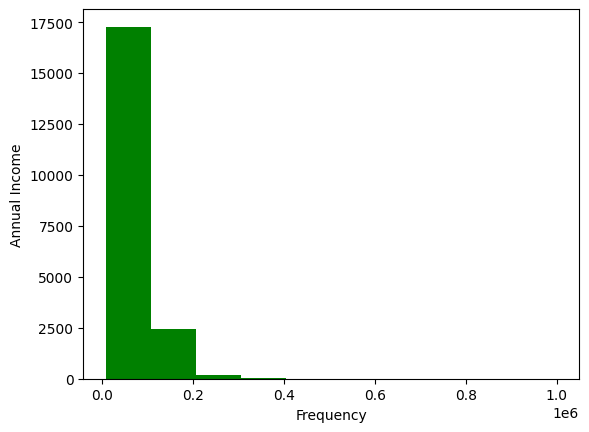

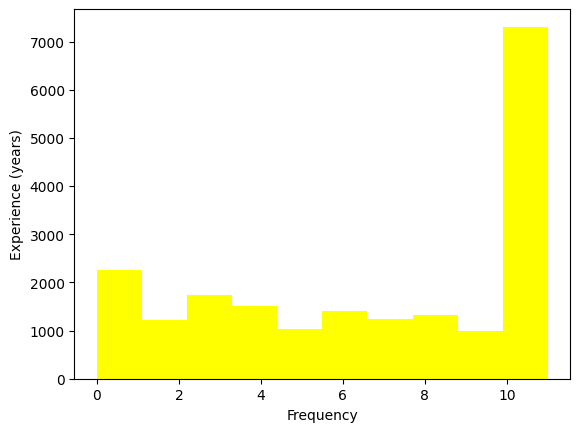

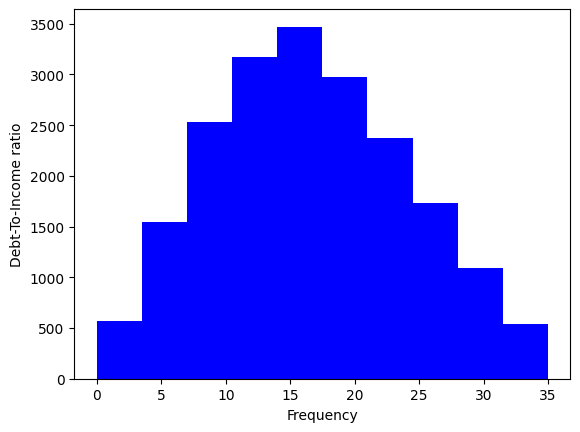

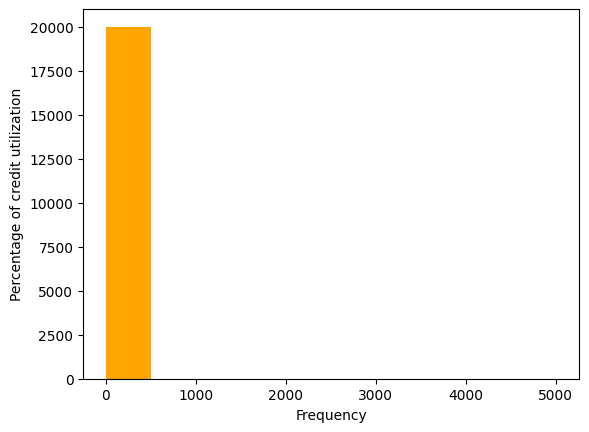

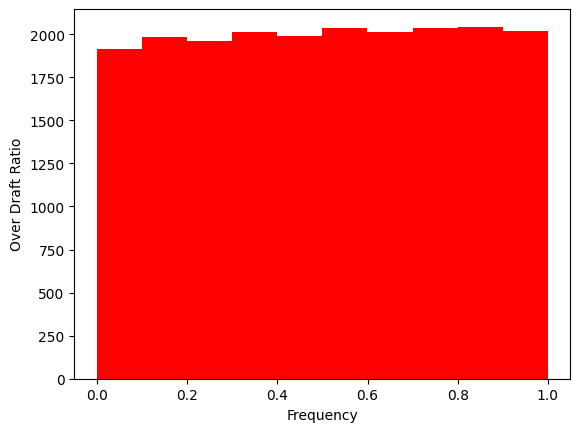

In [ ]:
# Histogram is a univariate plot  ('annual_inc','emp_length_num','dti','revol_util','od_ratio')
# Primary Purpose is to find the spread of the Data (Symmetry)
# Seconday Purpose is to find the outliers
plt.hist(ln.annual_inc, color='green') 
plt.ylabel('Annual Income')
plt.xlabel('Frequency')
plt.show()
plt.hist(ln.emp_length_num, color='yellow') 
plt.ylabel('Experience (years)')
plt.xlabel('Frequency')
plt.show()
plt.hist(ln.dti, color='blue') 
plt.ylabel('Debt-To-Income ratio')
plt.xlabel('Frequency')
plt.show()
plt.hist(ln.revol_util, color='Orange') 
plt.ylabel('Percentage of credit utilization')
plt.xlabel('Frequency')
plt.show()
plt.hist(ln.od_ratio, color='red') 
plt.ylabel('Over Draft Ratio')
plt.xlabel('Frequency')
plt.show()

###### **4. Outlier Analysis**

In [ ]:
# If there are outliers present in the data, it can be replaced with the values of upper and lower values 
#    (winsorization) or it can be removed (trimming).
# Can be applied only in the numerical columns ['annual_inc','emp_length_num','dti','revol_util','od_ratio']

# we can either remove or rectify using mean or median imputation. 
# dropping is not a good idea as we will be left with very fewer observations 
# due to higher percentage of outliers to train our model on, also if we replace 
# such a big percentage of the outliers with some approach (mean, median...etc.) 
# then it might result into less accurate or biased model.

# we can use an alternative : let's drop the extreme outliers and replace the 
# remaning by some approach (mean, median.....etc.)

Outliers in Quantity is 4.63% with count 926
Extreme Outliers in Quantity is 1.24% with count 249


<Axes: xlabel='annual_inc'>

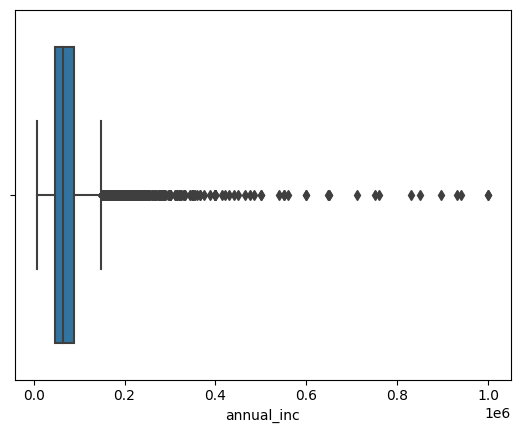

In [ ]:
# 1. annual_inc
q1,q3 = np.percentile(ln.annual_inc, [25,75])
iqr   = q3-q1
lower_inner_fence = q1 - 1.5*iqr
upper_inner_fence = q3 + 1.5*iqr
outlier = ln.annual_inc[(ln.annual_inc < lower_inner_fence) | (ln.annual_inc > upper_inner_fence)]
perc = (outlier.count()/ln.annual_inc.count())*100
print('Outliers in Quantity is %.2f%% with count %.f' % (perc, outlier.count()))
    
lower_outer_fence = q1 - 3*iqr
upper_outer_fence = q3 + 3*iqr
outlier_extreme = ln.annual_inc[(ln.annual_inc < lower_outer_fence) | (ln.annual_inc > upper_outer_fence)]
perc1 = (outlier_extreme.count()/ln.annual_inc.count())*100
print('Extreme Outliers in Quantity is %.2f%% with count %.f' % (perc1, outlier_extreme.count()))

sns.boxplot(x=ln['annual_inc'])

In [ ]:
# Outlier Treatment

Outliers in Quantity is 0.00% with count 0
Extreme Outliers in Quantity is 0.00% with count 0


<Axes: xlabel='emp_length_num'>

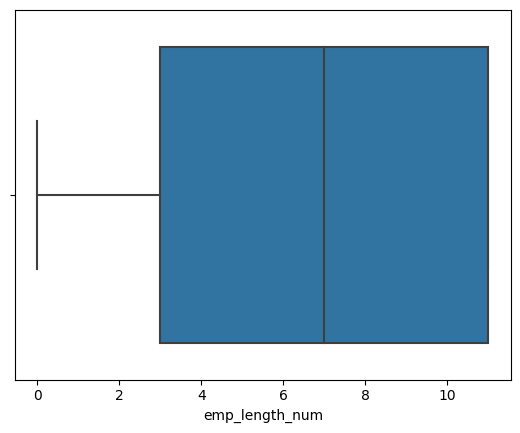

In [ ]:
# 2. emp_length_num
q1,q3 = np.percentile(ln.emp_length_num, [25,75])
iqr   = q3-q1
lower_inner_fence = q1 - 1.5*iqr
upper_inner_fence = q3 + 1.5*iqr
outlier = ln.emp_length_num[(ln.emp_length_num < lower_inner_fence) | (ln.emp_length_num> upper_inner_fence)]
perc = (outlier.count()/ln.emp_length_num.count())*100
print('Outliers in Quantity is %.2f%% with count %.f' % (perc, outlier.count()))
    
lower_outer_fence = q1 - 3*iqr
upper_outer_fence = q3 + 3*iqr
outlier_extreme = ln.emp_length_num[(ln.emp_length_num < lower_outer_fence) | (ln.emp_length_num > upper_outer_fence)]
perc1 = (outlier_extreme.count()/ln.emp_length_num.count())*100
print('Extreme Outliers in Quantity is %.2f%% with count %.f' % (perc1, outlier_extreme.count()))

sns.boxplot(x=ln['emp_length_num'])

Outliers in Quantity is 0.00% with count 0
Extreme Outliers in Quantity is 0.00% with count 0


<Axes: xlabel='dti'>

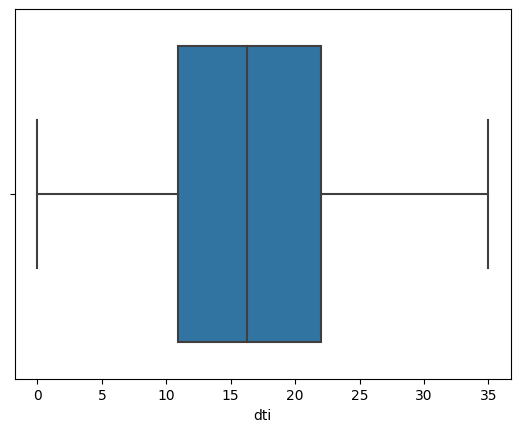

In [ ]:
# 3. dti
q1,q3 = np.percentile(ln.dti, [25,75])
iqr   = q3-q1
lower_inner_fence = q1 - 1.5*iqr
upper_inner_fence = q3 + 1.5*iqr
outlier = ln.dti[(ln.dti< lower_inner_fence) | (ln.dti> upper_inner_fence)]
perc = (outlier.count()/ln.dti.count())*100
print('Outliers in Quantity is %.2f%% with count %.f' % (perc, outlier.count()))
    
lower_outer_fence = q1 - 3*iqr
upper_outer_fence = q3 + 3*iqr
outlier_extreme = ln.dti[(ln.dti < lower_outer_fence) | (ln.dti > upper_outer_fence)]
perc1 = (outlier_extreme.count()/ln.dti.count())*100
print('Extreme Outliers in Quantity is %.2f%% with count %.f' % (perc1, outlier_extreme.count()))

sns.boxplot(x=ln['dti'])

Outliers in Quantity is 0.01% with count 2
Extreme Outliers in Quantity is 0.01% with count 1


<Axes: xlabel='revol_util'>

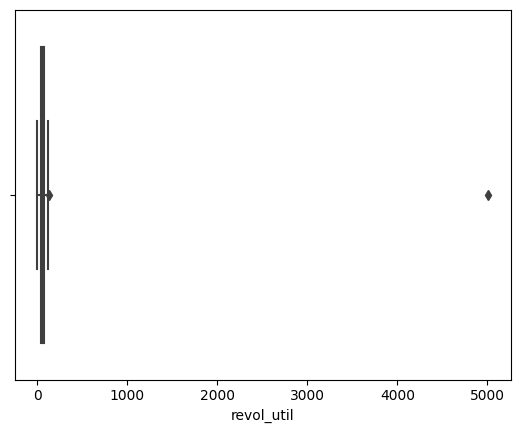

In [ ]:
# 4. revol_util
q1,q3 = np.percentile(ln.revol_util, [25,75])
iqr   = q3-q1
lower_inner_fence = q1 - 1.5*iqr
upper_inner_fence = q3 + 1.5*iqr
outlier = ln.revol_util[(ln.revol_util< lower_inner_fence) | (ln.revol_util> upper_inner_fence)]
perc = (outlier.count()/ln.revol_util.count())*100
print('Outliers in Quantity is %.2f%% with count %.f' % (perc, outlier.count()))
    
lower_outer_fence = q1 - 3*iqr
upper_outer_fence = q3 + 3*iqr
outlier_extreme = ln.revol_util[(ln.revol_util < lower_outer_fence) | (ln.revol_util > upper_outer_fence)]
perc1 = (outlier_extreme.count()/ln.revol_util.count())*100
print('Extreme Outliers in Quantity is %.2f%% with count %.f' % (perc1, outlier_extreme.count()))

sns.boxplot(x=ln['revol_util'])

Outliers in Quantity is 0.00% with count 0
Extreme Outliers in Quantity is 0.00% with count 0


<Axes: xlabel='od_ratio'>

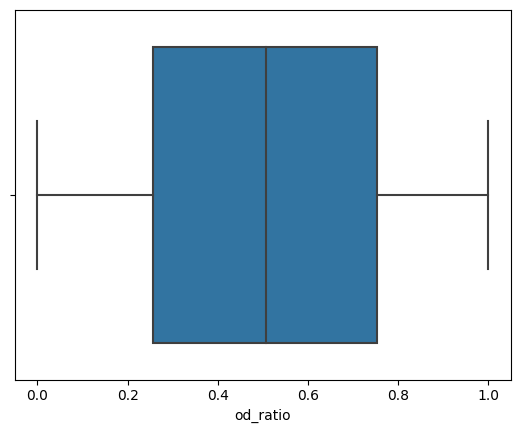

In [ ]:
# 5. od_ratio
q1,q3 = np.percentile(ln.od_ratio, [25,75])
iqr   = q3-q1
lower_inner_fence = q1 - 1.5*iqr
upper_inner_fence = q3 + 1.5*iqr
outlier = ln.od_ratio[(ln.od_ratio< lower_inner_fence) | (ln.od_ratio> upper_inner_fence)]
perc = (outlier.count()/ln.od_ratio.count())*100
print('Outliers in Quantity is %.2f%% with count %.f' % (perc, outlier.count()))
    
lower_outer_fence = q1 - 3*iqr
upper_outer_fence = q3 + 3*iqr
outlier_extreme = ln.od_ratio[(ln.od_ratio < lower_outer_fence) | (ln.od_ratio > upper_outer_fence)]
perc1 = (outlier_extreme.count()/ln.od_ratio.count())*100
print('Extreme Outliers in Quantity is %.2f%% with count %.f' % (perc1, outlier_extreme.count()))

sns.boxplot(x=ln['od_ratio'])